# Step1: Load_Data

In [38]:
# import req library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Data in format y-m-d

In [39]:
# Load the dataset

file_path = '/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d') # Changed %y to %Y

## s(i) EDA

EDA = Exploratory data analysis

In [40]:
# import ydata python library instead of pandas-profiling

# !pip install ydata-profiling

# from ydata_profiling import ProfileReport

# # create profile
# profile = ProfileReport(data)

# # save report
# profile.to_file(output_file='output_TCS.html')

## s(ii) Trail_01_deleteLast_5rows

In [41]:

file_path = '/content/cleanData_TCS_25Aug2004_5sep2024_NSE.csv'

data = pd.read_csv(file_path)
# Display the original dataset
print("Original dataset:")
print(data)

# Remove the last 5 rows
data = data[:-5]

# Display the updated dataset
print("\nUpdated dataset (last 5 rows removed):")
print(data)


Original dataset:
            Date      Open      High       Low     Close       Volume
0     2004-08-25  1,198.70  1,198.70       979    987.95  1,71,16,372
1     2004-08-26       992       997     975.3       979    50,55,400
2     2004-08-27     982.4     982.4    958.55    962.65    38,30,750
3     2004-08-30     969.9       990       965    986.75    30,58,151
4     2004-08-31     986.5       990       976     988.1    26,49,332
...          ...       ...       ...       ...       ...          ...
4962  2024-08-30  4,500.00  4,592.25  4,487.80  4,553.75    36,37,222
4963  2024-09-02  4,576.00  4,588.00  4,512.00  4,521.05    12,16,500
4964  2024-09-03  4,521.05  4,555.90  4,495.90  4,512.35    17,17,263
4965  2024-09-04  4,476.95  4,487.00  4,436.70  4,479.25    12,65,505
4966  2024-09-05  4,481.00  4,499.00  4,454.15  4,475.95    16,88,793

[4967 rows x 6 columns]

Updated dataset (last 5 rows removed):
            Date      Open      High       Low     Close       Volume
0     2

# Step2: Data_PreProcessing

## s(i) assign_Dep_Indep_Variable

In [42]:
# Independent variables (X-axis): 'Open', 'Low', 'High', 'Adj Close', 'Volume'
# Dependent variable (Y-axis): 'Close'


X = data[['Open', 'Low', 'High', 'Volume']].values
Y = data['Close'].values

In [43]:
X

array([['1,198.70', '979', '1,198.70', '1,71,16,372'],
       ['992', '975.3', '997', '50,55,400'],
       ['982.4', '958.55', '982.4', '38,30,750'],
       ...,
       ['4,505.00', '4,486.80', '4,510.00', '9,30,697'],
       ['4,498.75', '4,457.30', '4,562.50', '18,48,058'],
       ['4,460.00', '4,460.00', '4,556.00', '21,33,641']], dtype=object)

## s(ii) Normalize_MinMax_Scale

In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Replace commas in numerical columns with empty strings and convert to numeric

for col in ['Open', 'Low', 'High', 'Volume', 'Close']: # Include 'Close' in the loop

    if data[col].dtype == object:
        data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')
    else:
      pass



# Now, redefine X and Y using the updated 'data'
X = data[['Open', 'Low', 'High', 'Volume']].values
Y = data['Close'].values


scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

In [45]:
# Scale the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

Why 60?

Ans: In summary, look_back = 60 means you are using the previous 60 time steps of data to predict the next time step in your time series prediction task. Adjusting this parameter might affect how your model learns from historical data and predicts future values.



*   The choice of look_back = 60 in our example suggests that we are using 60 previous time steps (or data points) to predict the next data point in our time series.




In [46]:
# Create a function to create sequences for LSTM

def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)


time_steps = 60  # Use the past 60 days to predict the next day
X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)

## s(iii) split_TrainTest

In [47]:
# Split the data into training and test sets


train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing


X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Step3: cLSTM_Model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

 Define the Corrector LSTM (cLSTM) Model

In [49]:

# Define the cLSTM model
class cLSTMModel:
    def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        self.model = Sequential()

        # First LSTM layer
        self.model.add(LSTM(units=50, return_sequences=True, input_shape=(input_size, 1)))
        self.model.add(Dropout(dropout))

        # Second LSTM layer
        self.model.add(LSTM(units=50, return_sequences=False))
        self.model.add(Dropout(dropout))

        # Dense layer for final prediction
        self.model.add(Dense(units=output_size))

        # Compile the model
        self.model.compile(optimizer='adam', loss='mean_squared_error')

    def train(self, X_train, y_train, epochs=50, batch_size=32, validation_data=None):
        return self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=1)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test, verbose=0)


SARIMA Model for Correction

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Function to fit and forecast SARIMA model
def fit_sarima(data, order=(5, 1, 0)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    return forecast[0]

# Function to apply correction based on SARIMA
def correct_lstm_output(lstm_output, actual, threshold=0.05):
    forecast = fit_sarima(actual)  # Get SARIMA forecast for correction

    # Calculate error between SARIMA forecast and LSTM output
    error = np.abs(forecast - lstm_output)

    # If error exceeds the threshold, correct the LSTM output
    if error > threshold:
        corrected_output = forecast
    else:
        corrected_output = lstm_output

    return corrected_output


In [52]:
# model summary
model = cLSTMModel()

model.model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Training the cLSTM Model

In [53]:
# Initialize cLSTM model
clstm = cLSTMModel(input_size=X_train.shape[1], hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2)

# Train the model
clstm.train(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3233886.0000 - val_loss: 11753862.0000
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3072402.7500 - val_loss: 11703365.0000
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3094710.2500 - val_loss: 11656904.0000
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3054707.2500 - val_loss: 11612187.0000
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3091121.7500 - val_loss: 11568109.0000
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3004249.0000 - val_loss: 11524589.0000
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3035755.2500 - val_loss: 11481398.0000
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2974626.0000 - val_loss: 11438869.0000
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2947610.2500 - val_loss: 11396662.0000
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2967799.7500 - val_loss: 11354647.0000


In [54]:
import numpy as np


def correct_lstm_output(predicted_values, actual_values, threshold=0.05):
    # Calculate the residual (difference) between predicted and actual values
    residual = predicted_values - actual_values

    # Apply a simple correction factor based on the threshold (this could be SARIMA model-based logic)
    correction_factor = residual * threshold

    # Correct the predicted values by adding the correction factor
    corrected_values = predicted_values + correction_factor
    return corrected_values


In [55]:
# Get predictions from the model
y_pred = clstm.predict(X_test)


corrected_predictions = []

# Apply SARIMA correction to the LSTM predictions (now on arrays)
for i in range(len(y_pred)):
    # We expect both predicted values and actual values to be arrays (or at least series)
    corrected_prediction = correct_lstm_output(y_pred[i], Y_test[i], threshold=0.05)
    corrected_predictions.append(corrected_prediction)

# Inverse transform the predictions and actual values using the scaler for Y (scaler_Y)
y_pred = scaler_Y.inverse_transform(np.array(corrected_predictions).reshape(-1, 1))
y_test = scaler_Y.inverse_transform(Y_test.reshape(-1, 1))



import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
RMSE: 14806622.99230286


In [56]:
print(f"y_pred[i]: {y_pred[i]}, type: {type(y_pred[i])}, shape: {np.shape(y_pred[i])}")
print(f"Y_test[i]: {Y_test[i]}, type: {type(Y_test[i])}, shape: {np.shape(Y_test[i])}")


y_pred[i]: [-615088.25], type: <class 'numpy.ndarray'>, shape: (1,)
Y_test[i]: 4511.8, type: <class 'numpy.float64'>, shape: ()


Prediction and Correction

In [57]:
# Function to apply correction based on SARIMA
def correct_lstm_output(lstm_output, actual, threshold=0.05):
    actual = actual.reshape(-1, 1)  # Reshape for SARIMA

    # Fit SARIMA to the entire actual data
    forecast = fit_sarima(actual[:, 0])  # Pass the entire time series for SARIMA

    # Calculate error between SARIMA forecast and LSTM output
    error = np.abs(forecast - lstm_output)

    # If error exceeds the threshold, correct the LSTM output
    if error > threshold:
        corrected_output = forecast
    else:
        corrected_output = lstm_output

    return corrected_output

Evaluation

Evaluation Loss (Mean Squared Error): 11354647.0


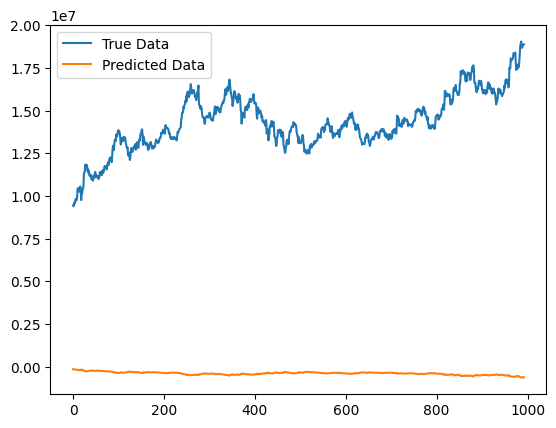

In [58]:
# Evaluate the model performance

evaluation = clstm.evaluate(X_test, Y_test)
print(f"Evaluation Loss (Mean Squared Error): {evaluation}")

# Optionally plot the results
import matplotlib.pyplot as plt

plt.plot(y_test, label='True Data')
plt.plot(y_pred, label='Predicted Data')
plt.legend()
plt.show()


# Step4: Predicate

In [59]:
# Forecasting the next 5 days
def forecast(model, X, n_steps):
    forecasted = []
    # Initialize current_step with the last sequence from X_seq but only with the first feature (index 0)
    current_step = X[-1][:, 0].reshape(1, time_steps, 1) # Change here

    for _ in range(n_steps):
        # Reshape to match expected input shape of LSTM (batch_size, time_steps, n_features)
        predicted = model.predict(current_step)

        # Extract prediction and append to forecasted list
        forecasted.append(predicted[0, 0])

        # Shift the current_step one step to the left and insert prediction
        current_step = np.roll(current_step, -1, axis=1)
        current_step[0, -1, 0] = predicted[0,0]  # Update with the predicted value

    return scaler_Y.inverse_transform(np.array(forecasted).reshape(-1, 1))

# Forecast the next 5 days
forecasted_prices = forecast(model, X_seq, 5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [60]:
# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])

# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

# next_5_dates

## s(i) Next_5days

In [61]:
# Print the next 5 days' closing prices with dates


for date, price in zip(next_5_dates, forecasted_prices):
    print(f" {date.strftime('%Y-%m-%d')} : {price[0]}")

 2024-08-30 : 455.9604797363281
 2024-08-31 : 433.74188232421875
 2024-09-01 : 401.6917724609375
 2024-09-02 : 368.4352722167969
 2024-09-03 : 338.9972839355469


## s(ii) plot_only5days

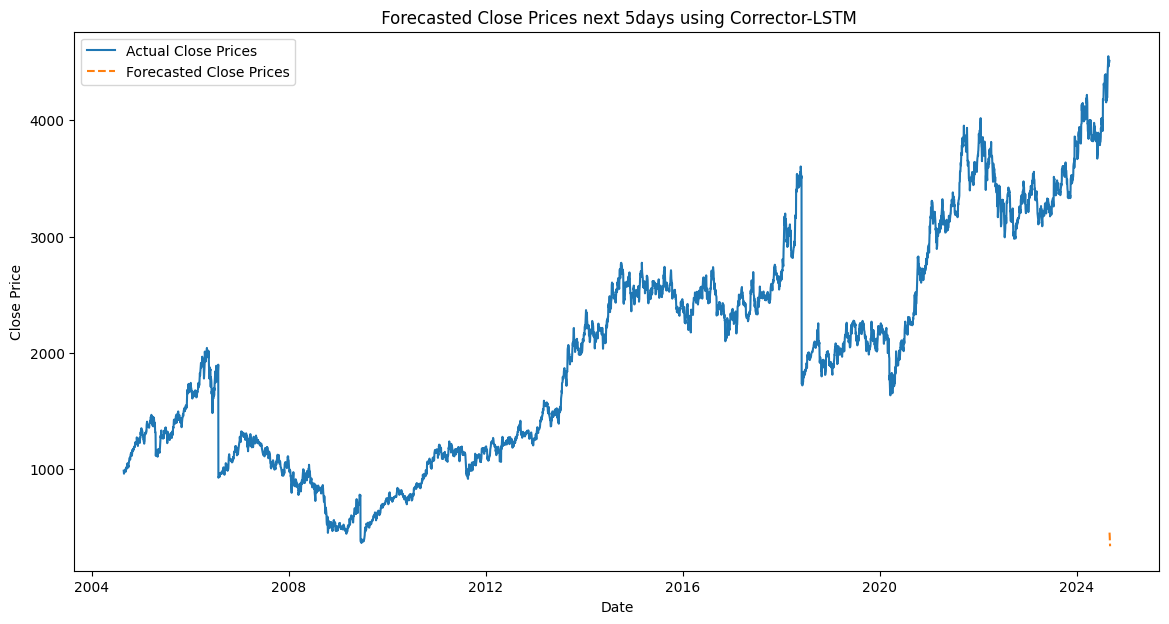

In [62]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt


# Plotting the results
plt.figure(figsize=(14, 7))


# Convert 'Date' column to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    # Use '%Y-%m-%d' format for four-digit year
    data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Convert dates to naive timestamps if they are timezone-aware
plt.plot(data['Date'].dt.tz_localize(None), data['Close'], label='Actual Close Prices')


# Plot forecasted closing prices
forecasted_dates = pd.to_datetime(next_5_dates)
# Convert dates to naive timestamps if they are timezone-aware
plt.plot(forecasted_dates.tz_localize(None), forecasted_prices, label='Forecasted Close Prices', linestyle='--')



plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(' Forecasted Close Prices next 5days using Corrector-LSTM')
plt.legend()
plt.show()

In [63]:
evaluation = clstm.evaluate(X_test, Y_test)
print(f"Evaluation Loss (Mean Squared Error): {evaluation}")

Evaluation Loss (Mean Squared Error): 11354647.0
